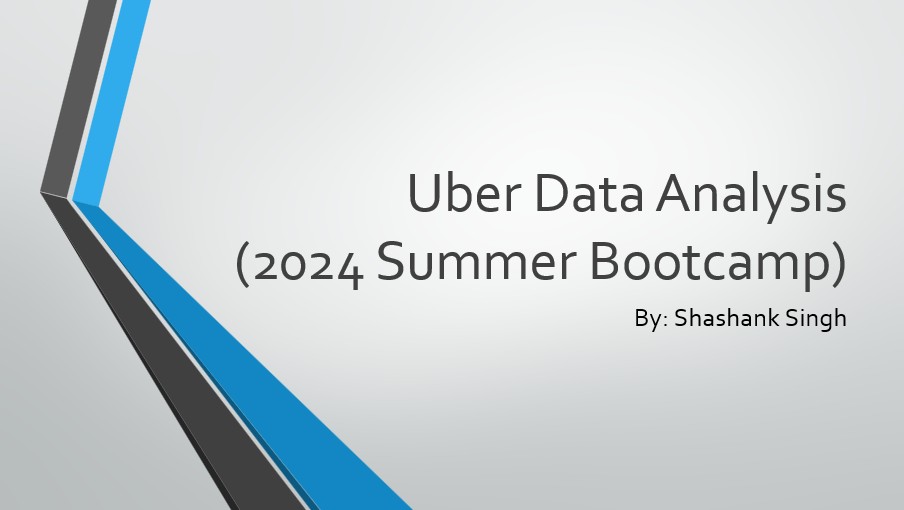

# List Of Tables

# List of figures

# Problem Statement

The data contains the details for the Uber rides across various boroughs (subdivisions) of New York City at an hourly level and attributes associated with weather conditions at that time.

# Importing the Important libraries

In [354]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the Dataset

In [355]:
df = pd.read_csv("Uber_Data_New.csv")


# 1- Display first five rows of teh dataset

In [356]:
df.head()

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
0,1/1/2015 1:00,Bronx,152.0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
1,1/1/2015 1:00,Brooklyn,1519.0,5.0,10.0,NaN,7.0,1023.5,0.0,0.0,0.0,0.0,?
2,1/1/2015 1:00,EWR,0.0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
3,1/1/2015 1:00,Manhattan,5258.0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
4,1/1/2015 1:00,Queens,405.0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y


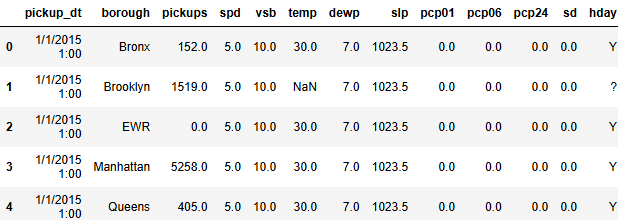

## Observations:
* First five rows of the dataset
* In first five rows we can see a "?" in the hday values.

# 2- Display last five rows of the dataset

In [357]:
df.tail()

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
29096,30-06-2015 23:00,EWR,0.0,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N
29097,30-06-2015 23:00,Manhattan,3828.0,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N
29098,30-06-2015 23:00,Queens,580.0,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N
29099,30-06-2015 23:00,Staten Island,0.0,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N
29100,30-06-2015 23:00,NaN,3.0,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N


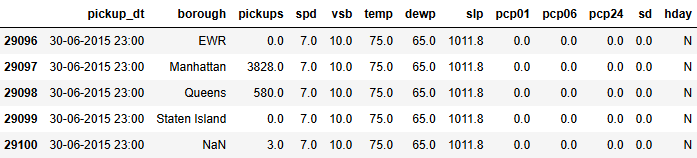

# 3- Check for shape of the dataset

In [358]:
df.shape

(29101, 13)

## Observations:
* There are 29101 number of rows in our dataset and 13 columns

# 4-	Check the datatypes of each feature.

In [359]:
df.dtypes

pickup_dt     object
borough       object
pickups      float64
spd          float64
vsb          float64
temp         float64
dewp         float64
slp          float64
pcp01        float64
pcp06        float64
pcp24        float64
sd           float64
hday          object
dtype: object

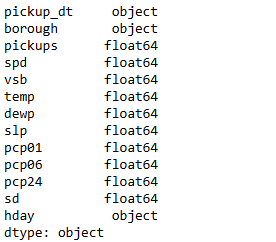

# 5- Check the Statistical summary 

In [360]:
df.describe()

,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd
count,29099.000000,29101.000000,29101.000000,28742.000000,29101.000000,2.910100e+04,29101.000000,29101.000000,29101.000000,29101.000000
mean,490.236022,5.984924,8.818125,47.900262,30.823065,1.052633e+03,0.003830,0.026129,0.090464,2.529169
std,995.680628,3.699007,2.442897,19.800541,21.283444,5.945147e+03,0.018933,0.093125,0.219402,4.520325
min,0.000000,0.000000,0.000000,0.000000,-16.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.000000,9.100000,32.000000,14.000000,1.012500e+03,0.000000,0.000000,0.000000,0.000000
50%,54.000000,6.000000,10.000000,46.500000,30.000000,1.018200e+03,0.000000,0.000000,0.000000,0.000000
75%,449.000000,8.000000,10.000000,65.000000,50.000000,1.022900e+03,0.000000,0.000000,0.050000,2.958333
max,7883.000000,21.000000,10.000000,89.000000,73.000000,1.015200e+06,0.280000,1.240000,2.100000,19.000000


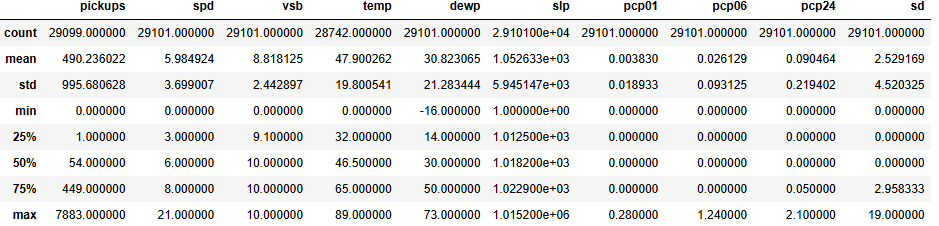

# 6- Check the null values

In [361]:
df.isnull().sum()

pickup_dt       0
borough      3043
pickups         2
spd             0
vsb             0
temp          359
dewp            0
slp             0
pcp01           0
pcp06           0
pcp24           0
sd              0
hday            0
dtype: int64

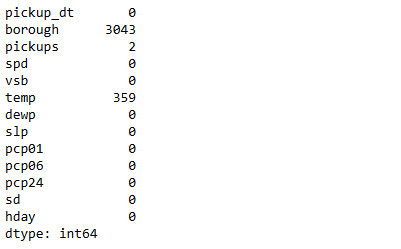

## Observations:
* There are 3043 null values in our dataset in borough column.
* There are 2 null values in pickup column and 359 null values in the temp column of the dataset.

# 7- Check the duplicate values

In [362]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")


Number of duplicate rows: 0


# 8- Check for outliers and their authenticity

In [363]:
numerical_columns = df.select_dtypes(include=['float64']).columns
# Calculate IQR to identify outliers
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = (df[numerical_columns] < (Q1 - 1.5 * IQR)) | (df[numerical_columns] > (Q3 + 1.5 * IQR))

# Display outliers summary
outliers_summary = outliers.sum()
print("Number of outliers in each column:")
print(outliers_summary)



Number of outliers in each column:
pickups    3498
spd         451
vsb        5322
temp          0
dewp          0
slp         281
pcp01      2633
pcp06      5641
pcp24      5016
sd         6060
dtype: int64


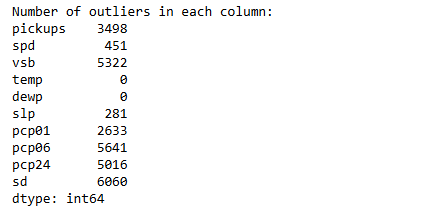

In [364]:
outlier_counts = outliers.sum()
total_counts = df.shape[0]
outlier_percentage = (outlier_counts / total_counts) * 100

# Display the percentage of outliers
print("Percentage of outliers in each column:")
print(outlier_percentage)

Percentage of outliers in each column:
pickups    12.020205
spd         1.549775
vsb        18.288031
temp        0.000000
dewp        0.000000
slp         0.965603
pcp01       9.047799
pcp06      19.384214
pcp24      17.236521
sd         20.824027
dtype: float64


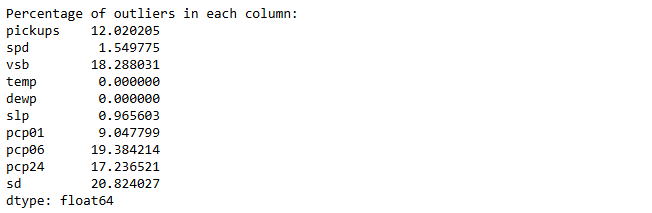

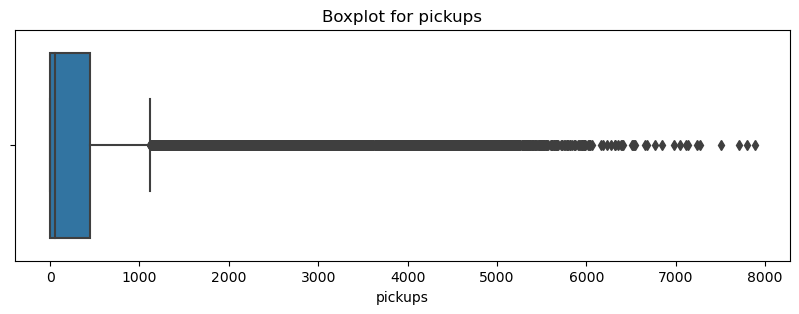

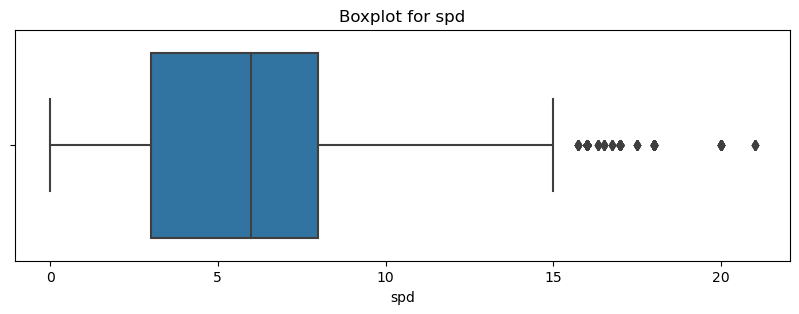

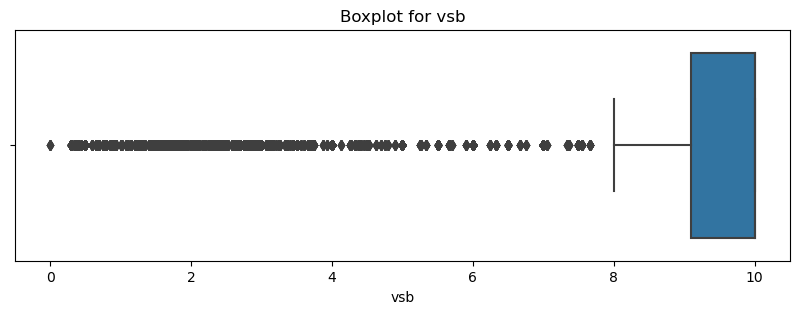

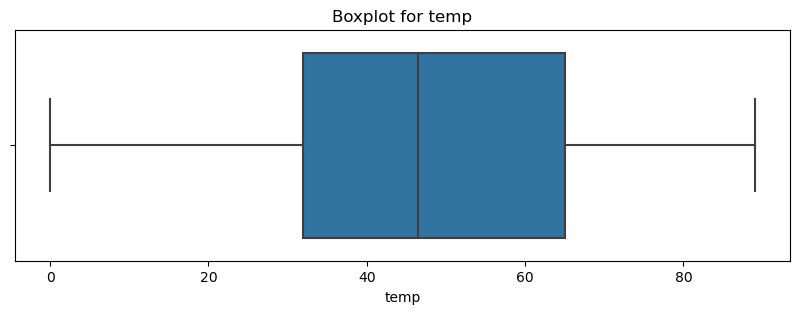

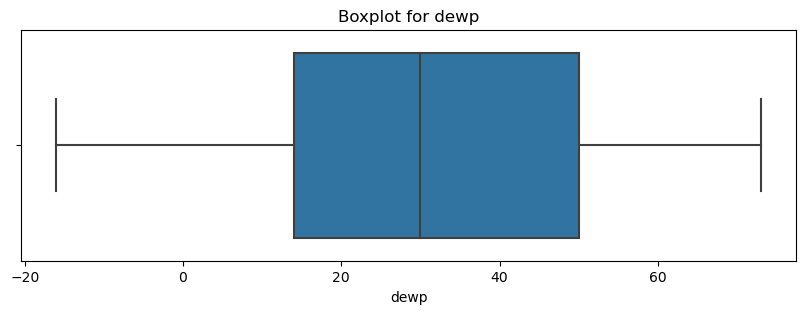

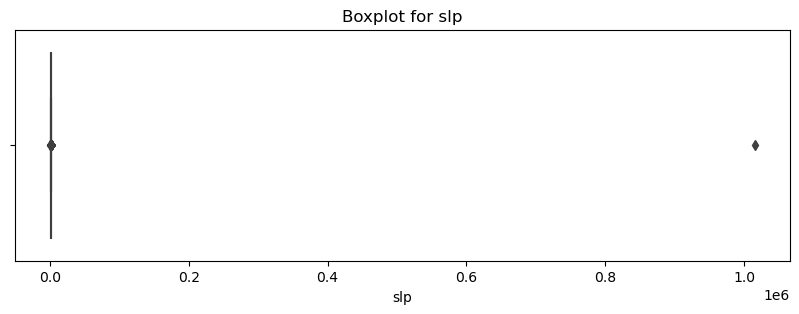

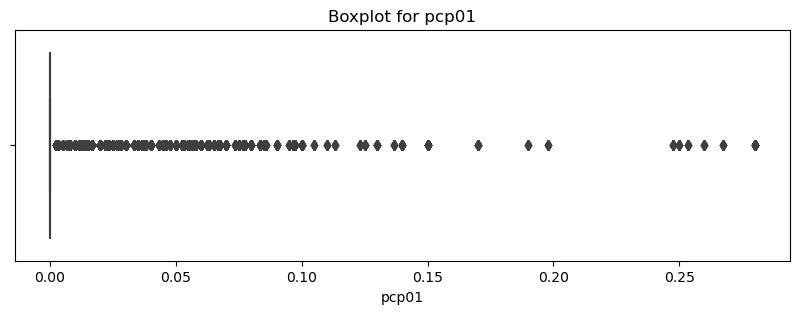

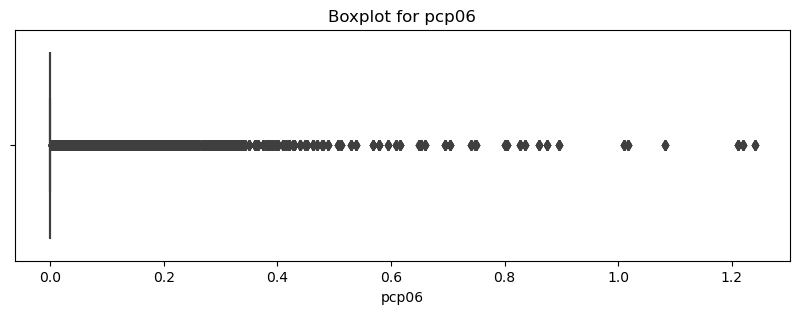

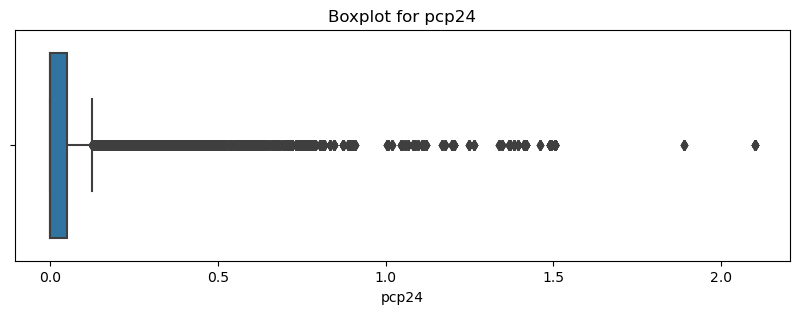

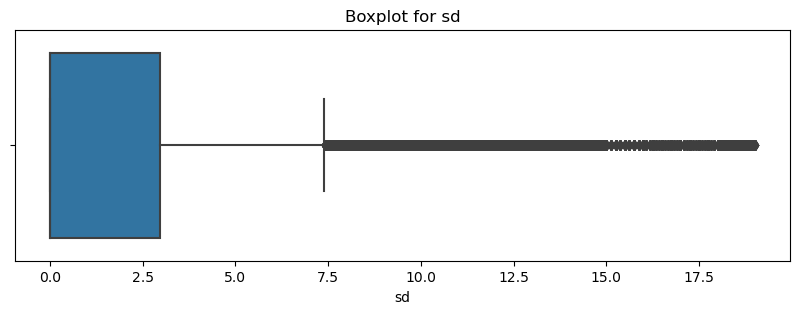

In [365]:
numerical_columns = df.select_dtypes(include=['float64']).columns

for column in numerical_columns:
    plt.figure(figsize=(10, 3))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot for {column}')
    plt.show()

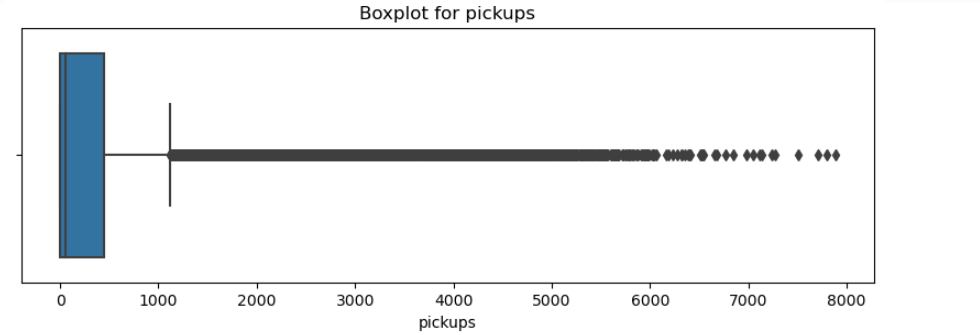

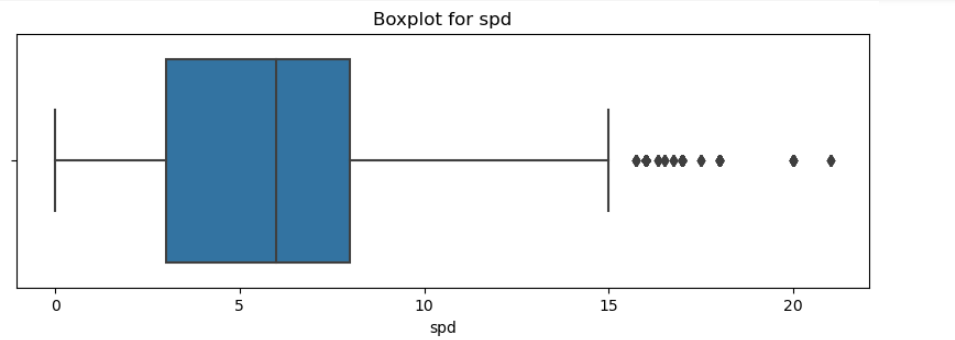

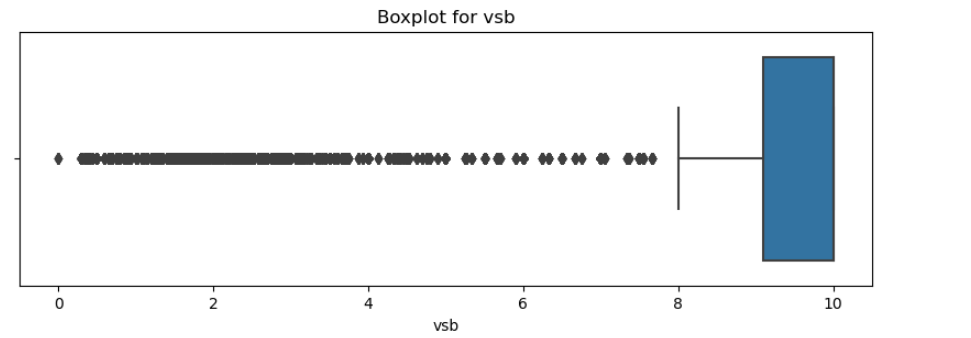

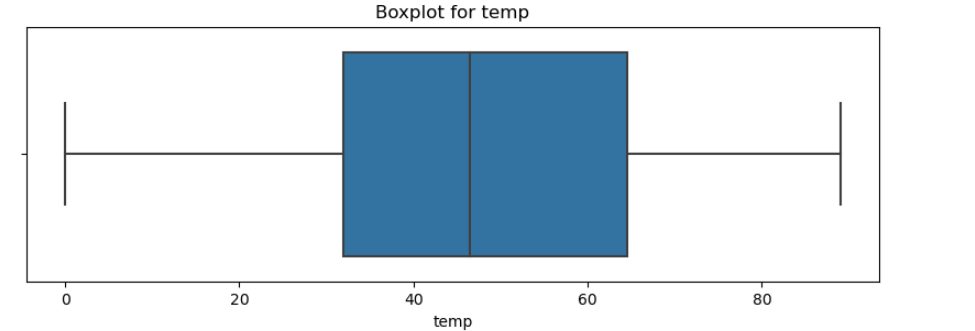

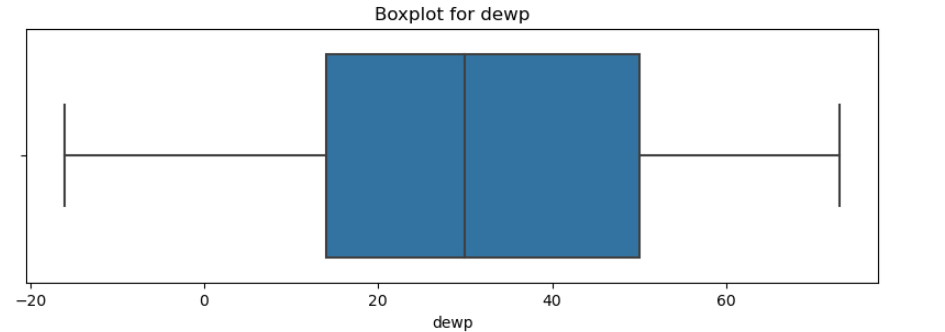

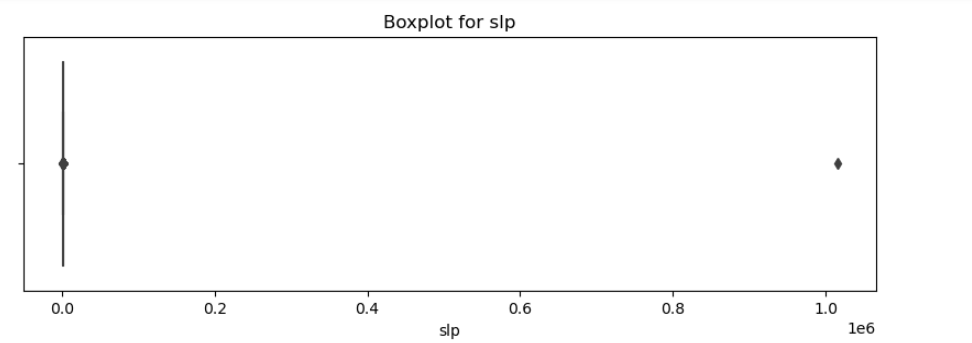

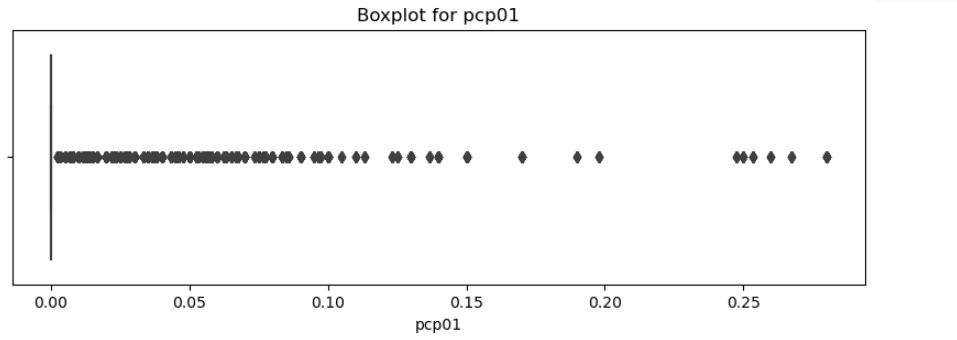

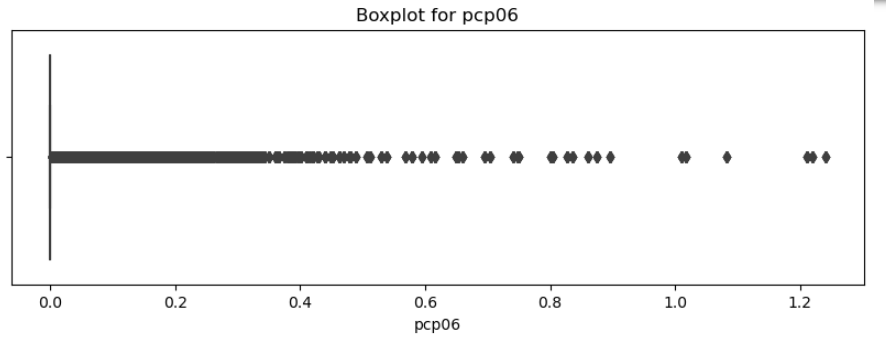

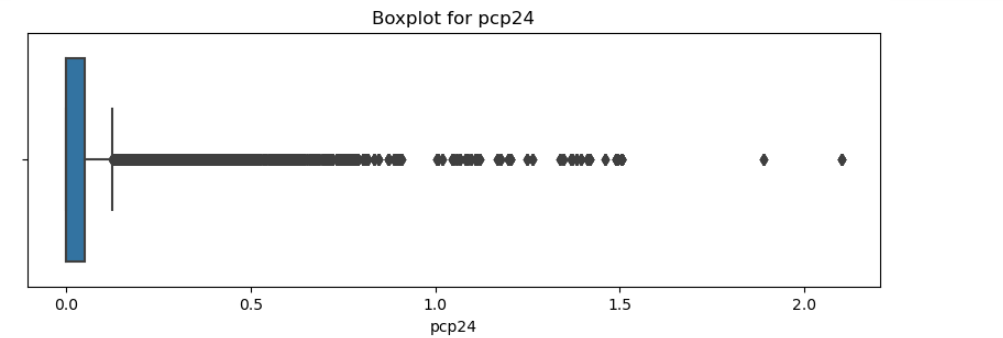

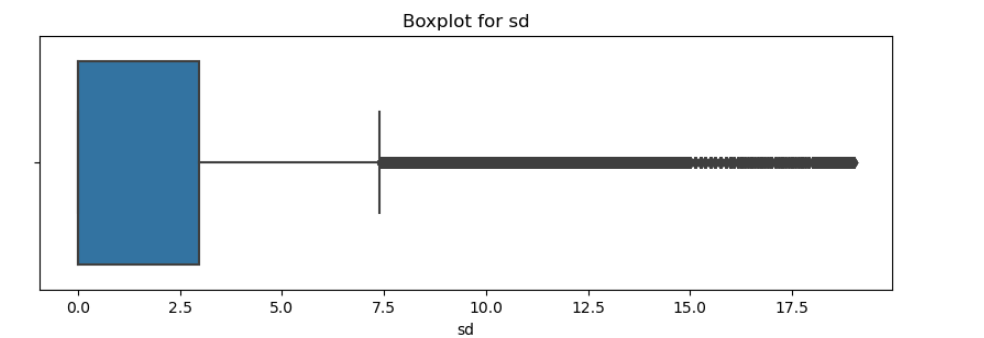

# 9- Check for Anomalies:

In [366]:

columns_with_question_mark = {}
for column in df.columns:
    count = (df[column] == '?').sum()
    if count > 0:
        columns_with_question_mark[column] = count

print("Columns with '?' and their counts:")
for column, count in columns_with_question_mark.items():
    print(f"{column}: {count}")


Columns with '?' and their counts:
hday: 2


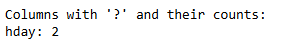

In [367]:
# Filter rows where 'hday' column has '?'
rows_with_question_mark= df[df['hday'] == '?']

print("Rows with '?' in 'hday' column:")
print(rows_with_question_mark)

Rows with '?' in 'hday' column:
          pickup_dt   borough  pickups  spd   vsb  temp  dewp     slp  pcp01  \
1     1/1/2015 1:00  Brooklyn   1519.0  5.0  10.0   NaN   7.0  1023.5    0.0   
123  1/1/2015 19:00    Queens    238.0  7.0  10.0  37.0   7.0  1016.2    0.0   

     pcp06  pcp24   sd hday  
1      0.0    0.0  0.0    ?  
123    0.0    0.0  0.0    ?  


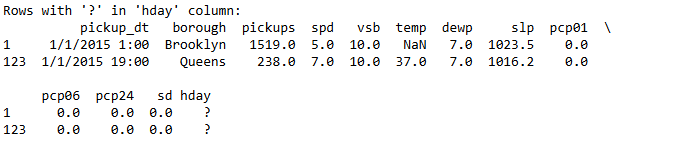

## Observations:
* We have got dtypes of date as object that should be date and time.
* There are two rows which have "?" as the value in their hday value.
* The number of outliers is much more in our dataset percentage ranging from 12-20%.



# 10- Necessary cleaning needed

In [368]:
df.replace('?', np.nan, inplace=True)

In [369]:
rows_with_question_mark= df[df['hday'] == '?']

print("Rows with '?' in 'hday' column:")
print(rows_with_question_mark)


Rows with '?' in 'hday' column:
Empty DataFrame
Columns: [pickup_dt, borough, pickups, spd, vsb, temp, dewp, slp, pcp01, pcp06, pcp24, sd, hday]
Index: []


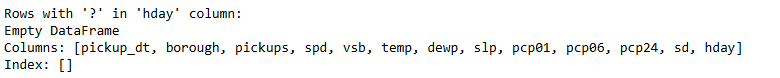

## Removing null values using mean,median and mode


In [370]:
# Filling missing values in pickups coloumn with the median of the column
df['pickups'].replace(np.nan,df['pickups'].median(),inplace=True)


In [371]:
# Filling null values in borough column with the mode of the column
df['borough'].replace(np.nan,df['borough'].mode().values[0],inplace=True)


In [372]:
# Filling missing values in temp columns with the median of the column
df['temp'].replace(np.nan,df['temp'].median(),inplace=True)


In [373]:
# Filling null values in hday column with the mode of the column
df['hday'].replace(np.nan,df['hday'].mode().values[0],inplace=True)


In [374]:
df.isnull().sum()

pickup_dt    0
borough      0
pickups      0
spd          0
vsb          0
temp         0
dewp         0
slp          0
pcp01        0
pcp06        0
pcp24        0
sd           0
hday         0
dtype: int64

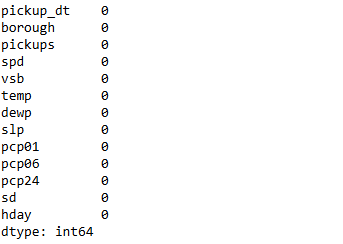

## Removing Outliers from the dataset as data cleaning process

In [375]:
#Function to remove the Outliers

def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range    

for i in df.columns:
    if df[i].dtype !='object':
        lr,ur=remove_outlier(df[i])
        df[i]=np.where(df[i]>ur,ur,df[i])
        df[i]=np.where(df[i]<lr,lr,df[i])

In [376]:
# Calculate IQR to identify outliers
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = (df[numerical_columns] < (Q1 - 1.5 * IQR)) | (df[numerical_columns] > (Q3 + 1.5 * IQR))

# Display outliers summary
outliers_summary = outliers.sum()
print("Number of outliers in each column:")
print(outliers_summary)

Number of outliers in each column:
pickups    0
spd        0
vsb        0
temp       0
dewp       0
slp        0
pcp01      0
pcp06      0
pcp24      0
sd         0
dtype: int64


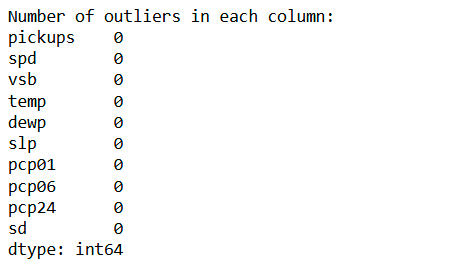

## Observations:
* No null values in the dataset.
* Now there is no outliers in our data.
* Since we have done most of the necessary cleaning of our data, now we will perform EDA on it. 

In [377]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29101 entries, 0 to 29100
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pickup_dt  29101 non-null  object 
 1   borough    29101 non-null  object 
 2   pickups    29101 non-null  float64
 3   spd        29101 non-null  float64
 4   vsb        29101 non-null  float64
 5   temp       29101 non-null  float64
 6   dewp       29101 non-null  float64
 7   slp        29101 non-null  float64
 8   pcp01      29101 non-null  float64
 9   pcp06      29101 non-null  float64
 10  pcp24      29101 non-null  float64
 11  sd         29101 non-null  float64
 12  hday       29101 non-null  object 
dtypes: float64(10), object(3)
memory usage: 2.9+ MB


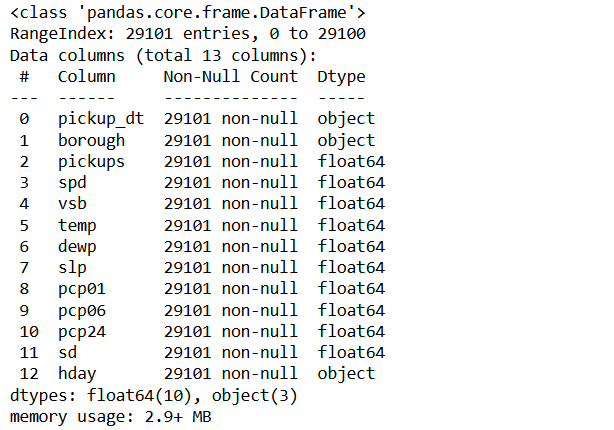

In [378]:
#Statistical summary 
df.describe()

,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd
count,29101.000000,29101.000000,29101.000000,29101.000000,29101.000000,29101.000000,29101.0,29101.0,29101.000000,29101.000000
mean,282.045256,5.961970,9.487576,47.882988,30.823065,1017.810618,0.0,0.0,0.030223,1.861165
std,386.660889,3.631521,0.906658,19.678631,21.283444,7.701187,0.0,0.0,0.049091,3.104397
min,0.000000,0.000000,7.750000,0.000000,-16.000000,996.900000,0.0,0.0,0.000000,0.000000
25%,1.000000,3.000000,9.100000,32.000000,14.000000,1012.500000,0.0,0.0,0.000000,0.000000
50%,54.000000,6.000000,10.000000,46.500000,30.000000,1018.200000,0.0,0.0,0.000000,0.000000
75%,449.000000,8.000000,10.000000,64.500000,50.000000,1022.900000,0.0,0.0,0.050000,2.958333
max,1121.000000,15.500000,10.000000,89.000000,73.000000,1038.500000,0.0,0.0,0.125000,7.395833


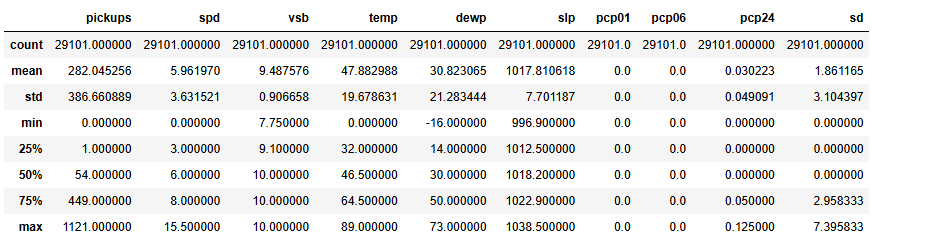

# 1- Pickup Analysis

In [379]:
# 1. Total number of Uber pickups across all boroughs
total_pickups = df['pickups'].sum()
total_pickups


8207799.0

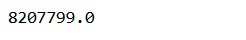

Borough with highest average hourly pickups: Manhattan (1002.285056412618 pickups/hour)


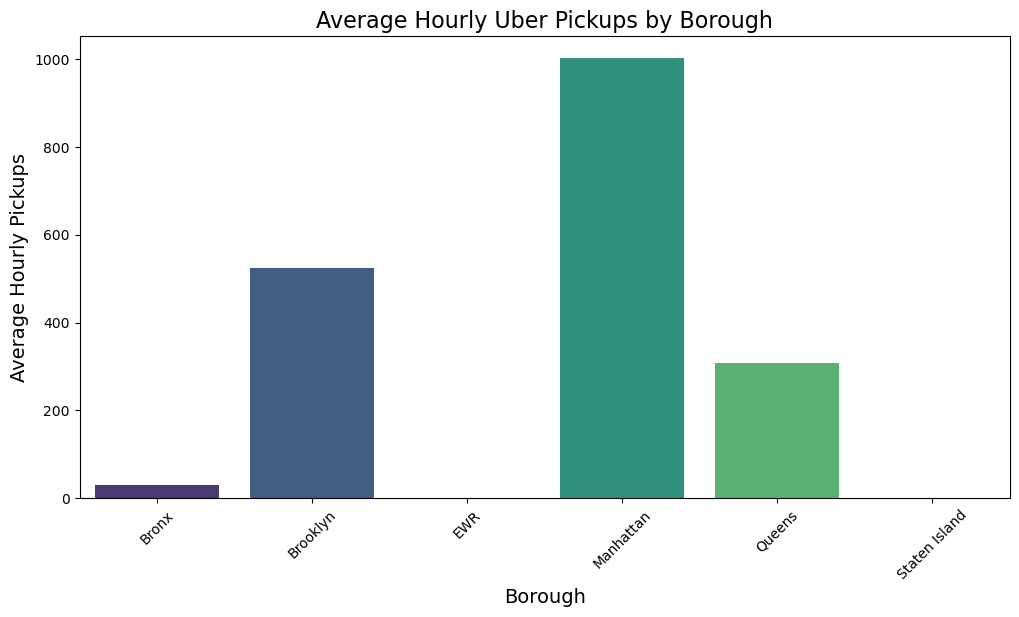

In [380]:
avg_hourly_pickups = df.groupby('borough')['pickups'].mean()
highest_avg_borough = avg_hourly_pickups.idxmax()
highest_avg_pickups = avg_hourly_pickups.max()


print(f"Borough with highest average hourly pickups: {highest_avg_borough} ({highest_avg_pickups} pickups/hour)")

# Plotting the data
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_hourly_pickups.index, y=avg_hourly_pickups.values, palette='viridis')


plt.title('Average Hourly Uber Pickups by Borough', fontsize=16)
plt.xlabel('Borough', fontsize=14)
plt.ylabel('Average Hourly Pickups', fontsize=14)
plt.xticks(rotation=45)

# Display the plot
plt.show()

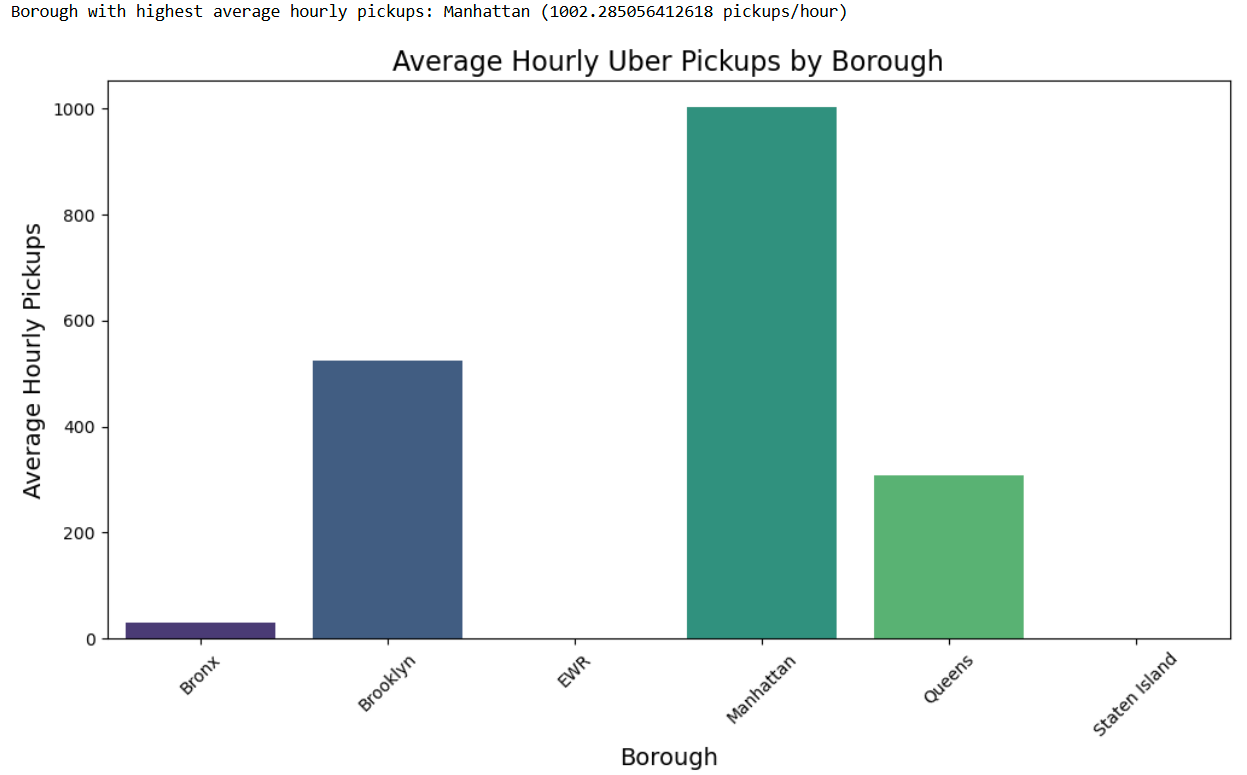

In [381]:
# Converting pickup_dt to datetime
df['pickup_dt'] = pd.to_datetime(df['pickup_dt'])

# Adding a column for the hour of the day
df['hour'] = df['pickup_dt'].dt.hour

# Adding a column for the day of the week
df['day_of_week'] = df['pickup_dt'].dt.day_name()

# Number of pickups by hour of the day
hourly_pickups = df.groupby('hour')['pickups'].mean().reset_index()

print(f"Number of pickups by hour of the day:\n{hourly_pickups}")


Number of pickups by hour of the day:
    hour     pickups
0      0  333.861411
1      1  276.578638
2      2  205.149573
3      3  153.505181
4      4  138.691581
5      5  148.648718
6      6  192.377500
7      7  237.443994
8      8  275.824247
9      9  292.635922
10    10  292.722449
11    11  291.485950
12    12  287.656250
13    13  284.920816
14    14  292.911184
15    15  304.999182
16    16  310.843393
17    17  315.169381
18    18  336.570728
19    19  346.274128
20    20  351.917275
21    21  353.895935
22    22  359.273242
23    23  359.614064


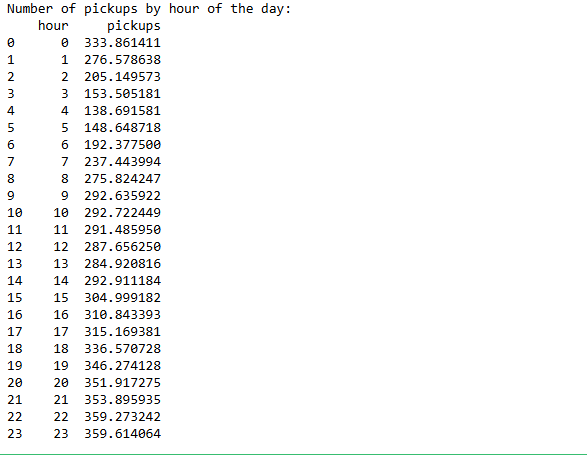

In [382]:
# Day of the week with the highest number of pickups
day_of_week_pickups = df.groupby('day_of_week')['pickups'].mean().reset_index()
day_with_highest_pickups = day_of_week_pickups.loc[day_of_week_pickups['pickups'].idxmax()]

print(f"Day of the week with the highest number of pickups:\n{day_with_highest_pickups}")

Day of the week with the highest number of pickups:
day_of_week      Saturday
pickups        313.247615
Name: 2, dtype: object


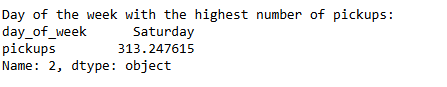

# 2- Weather Impact

In [383]:
#Correlation between temperature and the number of pickups
temp_pickup_corr = df['temp'].corr(df['pickups'])

print(f"The correlation between temperature and the number of pickups:\n{temp_pickup_corr}")


The correlation between temperature and the number of pickups:
0.0681348030389327


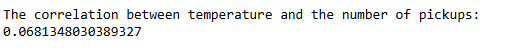

In [384]:
# Correlation between visibility and the number of pickups
vsb_pickup_corr = df['vsb'].corr(df['pickups'])

print(f"The Correlation between visibility and the number of pickups:\n{vsb_pickup_corr}")


The Correlation between visibility and the number of pickups:
-0.002851331164065039


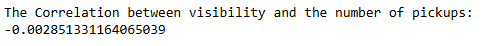

In [385]:
# Correlation between wind speed and the number of pickups
spd_pickup_corr = df['spd'].corr(df['pickups'])

print(f"The Correlation between wind speed and the number of pickups:\n{spd_pickup_corr}")


The Correlation between wind speed and the number of pickups:
-0.005233034976392543


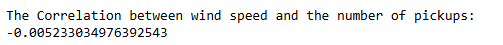

In [386]:
# Correlation between 1-hour precipitation and the number of pickups
pcp01_pickup_corr = df['pcp01'].corr(df['pickups'])

# Correlation between 6-hour precipitation and the number of pickups
pcp06_pickup_corr = df['pcp06'].corr(df['pickups'])

# Correlation between 24-hour precipitation and the number of pickups
pcp24_pickup_corr = df['pcp24'].corr(df['pickups'])

print(f"The Correlation between 1-hour precipitation and the number of pickups:\n{pcp01_pickup_corr}\n")
print(f"The Correlation between 6-hour precipitation and the number of pickups:\n{pcp06_pickup_corr}\n")
print(f"The Correlation between 24-hour precipitation and the number of pickups:\n{pcp24_pickup_corr}\n")


The Correlation between 1-hour precipitation and the number of pickups:
nan

The Correlation between 6-hour precipitation and the number of pickups:
nan

The Correlation between 24-hour precipitation and the number of pickups:
-0.01661551042211662



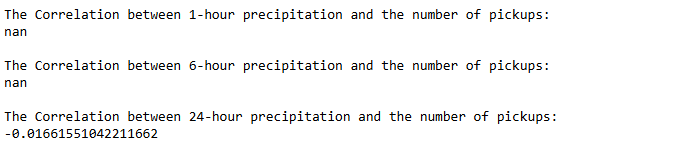

# 3- Seasonal Trends

In [387]:
# Convert pickup_dt to datetime
df['pickup_dt'] = pd.to_datetime(df['pickup_dt'])

# Adding a column for the season
def get_season(date):
    if date.month in [12, 1, 2]:
        return 'Winter'
    elif date.month in [3, 4, 5]:
        return 'Spring'
    elif date.month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['season'] = df['pickup_dt'].apply(get_season)

# Column for the hour of the day
df['hour'] = df['pickup_dt'].dt.hour

In [388]:
# Number of pickups by season
season_pickups = df.groupby('season')['pickups'].mean()

print(f"Number of pickups by season:\n{season_pickups}")

Number of pickups by season:
season
Fall      274.790931
Spring    286.412525
Summer    299.506847
Winter    266.311539
Name: pickups, dtype: float64


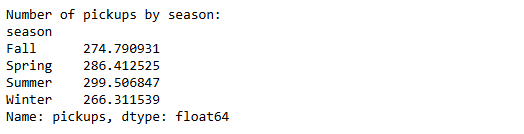

In [389]:
# Average number of pickups during holidays vs non-holidays
df['is_holiday'] = df['hday'] == 'Y'
holiday_pickups = df.groupby('is_holiday')['pickups'].mean()

print(f"Average number of pickups during holidays vs non-holidays:\n{holiday_pickups}")

Average number of pickups during holidays vs non-holidays:
is_holiday
False    282.180652
True     278.659517
Name: pickups, dtype: float64


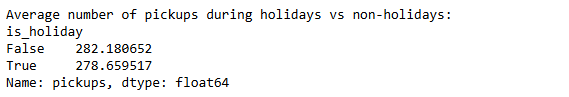

In [390]:
# Correlation between snow depth and number of pickups
snow_depth_corr = df['sd'].corr(df['pickups'])

print(f"The correlation between snow depth and number of pickups:\n{snow_depth_corr}")

The correlation between snow depth and number of pickups:
-0.025359545201925526


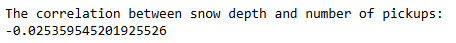

# 4- Hourly Trends

In [391]:
# Peak hours for Uber pickups in each borough
peak_hours_borough = df.groupby(['borough', 'hour'])['pickups'].mean().reset_index()
peak_hours_borough = peak_hours_borough.loc[peak_hours_borough.groupby('borough')['pickups'].idxmax()]

print(f"Peak hours for Uber pickups in each borough:\n{peak_hours_borough}")

Peak hours for Uber pickups in each borough:
           borough  hour      pickups
18           Bronx    18    40.496855
46        Brooklyn    22   785.226519
63             EWR    15     0.066298
89       Manhattan    17  1121.000000
118         Queens    22   477.403315
138  Staten Island    18     2.403315


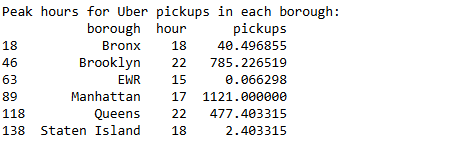

In [392]:
# Number of pickups during rush hours (7-9 AM, 5-7 PM)
df['is_rush_hour'] = df['hour'].isin([7, 8, 9, 17, 18, 19])
rush_hour_pickups = df.groupby('is_rush_hour')['pickups'].mean()

print(f"Number of pickups during rush hours (7-9 AM, 5-7 PM):\n{rush_hour_pickups}")

Number of pickups during rush hours (7-9 AM, 5-7 PM):
is_rush_hour
False    275.735359
True     300.613332
Name: pickups, dtype: float64


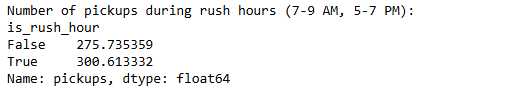

In [393]:
# Average number of pickups during late-night hours (12 AM - 4 AM)
df['is_late_night'] = df['hour'].isin([0, 1, 2, 3, 4])
late_night_pickups = df.groupby('is_late_night')['pickups'].mean()
print(f"Average number of pickups during late-night hours (12 AM - 4 AM):\n{late_night_pickups}")

Average number of pickups during late-night hours (12 AM - 4 AM):
is_late_night
False    297.110618
True     222.625892
Name: pickups, dtype: float64


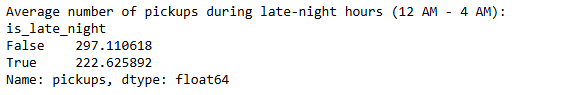

# 5- Borough Comparison

In [394]:
# Adding a column for weekends
df['is_weekend'] = df['pickup_dt'].dt.dayofweek >= 5

In [395]:
# Borough comparison during different weather conditions
weather_conditions = ['temp', 'vsb', 'spd', 'pcp01', 'pcp06', 'pcp24', 'sd']
borough_weather_pickups = df.groupby(['borough'] + weather_conditions)['pickups'].mean().reset_index()

print(f"Borough comparison during different weather conditions:\n{borough_weather_pickups}")

Borough comparison during different weather conditions:
             borough  temp    vsb   spd  pcp01  pcp06  pcp24        sd  \
0              Bronx   2.0  10.00   7.0    0.0    0.0  0.090  7.395833   
1              Bronx   2.0  10.00   8.0    0.0    0.0  0.090  7.395833   
2              Bronx   2.0  10.00  13.0    0.0    0.0  0.090  7.395833   
3              Bronx   3.0  10.00  11.0    0.0    0.0  0.090  7.395833   
4              Bronx   3.0  10.00  14.0    0.0    0.0  0.090  7.395833   
...              ...   ...    ...   ...    ...    ...    ...       ...   
17783  Staten Island  88.0   9.10   8.0    0.0    0.0  0.000  0.000000   
17784  Staten Island  88.0  10.00   7.0    0.0    0.0  0.000  0.000000   
17785  Staten Island  89.0   7.75   3.0    0.0    0.0  0.125  0.000000   
17786  Staten Island  89.0   7.75   5.0    0.0    0.0  0.125  0.000000   
17787  Staten Island  89.0   9.10   7.0    0.0    0.0  0.000  0.000000   

       pickups  
0         22.0  
1         20.5  
2   

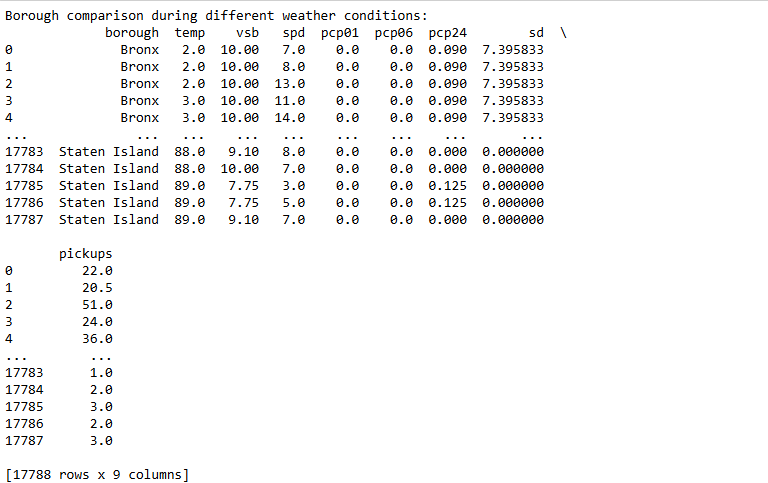

In [396]:
# Borough with the highest increase in pickups during holidays
df['is_holiday'] = df['hday'] == 'Y'
holiday_increase_borough = df.groupby(['borough', 'is_holiday'])['pickups'].mean().reset_index()
holiday_increase_borough = holiday_increase_borough.loc[holiday_increase_borough.groupby('borough')['pickups'].idxmax()]

print(f"Borough with the highest increase in pickups during holidays:\n{holiday_increase_borough}")


Borough with the highest increase in pickups during holidays:
          borough  is_holiday      pickups
0           Bronx       False    30.709296
2        Brooklyn       False   525.110127
5             EWR        True     0.041916
6       Manhattan       False  1002.765565
9          Queens        True   319.945783
10  Staten Island       False     1.606082


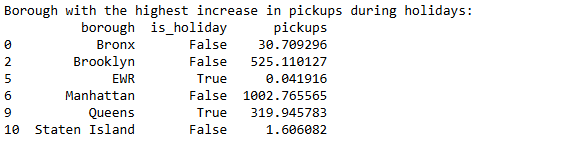

In [397]:
# Number of pickups on weekdays vs weekends for each borough
weekday_weekend_pickups = df.groupby(['borough', 'is_weekend'])['pickups'].mean().reset_index()

print(f"Number of pickups on weekdays vs weekends for each borough:\n{weekday_weekend_pickups}")

Number of pickups on weekdays vs weekends for each borough:
          borough  is_weekend      pickups
0           Bronx       False    28.792893
1           Bronx        True    35.098048
2        Brooklyn       False   477.847173
3        Brooklyn        True   640.487179
4             EWR       False     0.025525
5             EWR        True     0.020833
6       Manhattan       False   993.933441
7       Manhattan        True  1022.996795
8          Queens       False   302.674637
9          Queens        True   325.750801
10  Staten Island       False     1.520517
11  Staten Island        True     1.803686


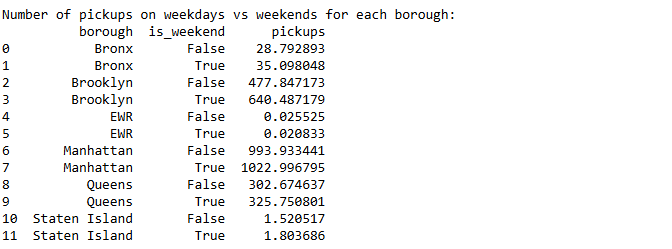

# 6- Weather Extremes

In [398]:
# Extreme weather conditions effect on pickups
extreme_weather = df[(df['temp'] > 90) | (df['temp'] < 20) | (df['pcp01'] > 1) | (df['sd'] > 2)]
extreme_weather_pickups = extreme_weather.groupby(['temp', 'pcp01', 'sd'])['pickups'].mean()

print(f"Extreme weather conditions effect on pickups:\n{extreme_weather_pickups}")

Extreme weather conditions effect on pickups:
temp  pcp01  sd      
0.0   0.0    0.000000      0.000000
2.0   0.0    7.395833    272.300000
3.0   0.0    7.395833    301.000000
4.0   0.0    7.395833    253.788235
5.0   0.0    7.395833    262.515152
                            ...    
55.0  0.0    7.041667    310.500000
56.0  0.0    7.395833    352.833333
57.0  0.0    7.250000    292.428571
58.0  0.0    7.395833    353.000000
59.0  0.0    7.395833    307.285714
Name: pickups, Length: 353, dtype: float64


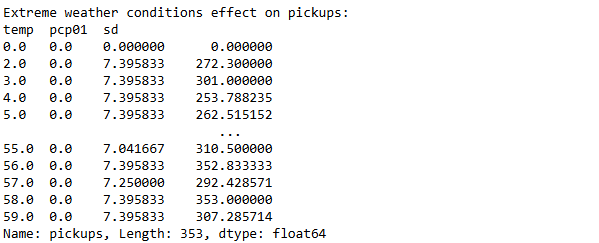

In [399]:
# Impact of visibility less than 1 mile on pickups
low_visibility = df[df['vsb'] < 1]
low_visibility_pickups = low_visibility['pickups'].mean()
normal_visibility_pickups = df[df['vsb'] >= 1]['pickups'].mean()

print(f"Low Visibility Pickups:\n{low_visibility_pickups}\n")
print(f"Normal Visibility Pickups:\n{normal_visibility_pickups}\n")

Low Visibility Pickups:
nan

Normal Visibility Pickups:
282.0452561767637



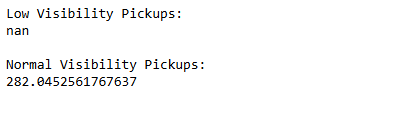

# 7- Data Correlations

In [400]:
# Correlation between sea level pressure and number of pickups
slp_pickup_corr = df['slp'].corr(df['pickups'])

print(f"The Correlation between sea level pressure and number of pickups:\n{slp_pickup_corr}")

The Correlation between sea level pressure and number of pickups:
-0.011690175691148415


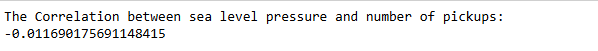

In [401]:
# Impact of different weather variables on pickups (correlation matrix)
weather_vars = df[['temp', 'dewp', 'spd', 'vsb', 'pickups']]
weather_corr_matrix = weather_vars.corr()
print(f"Impact of different weather variables on pickups (correlation matrix):\n{weather_corr_matrix}")


Impact of different weather variables on pickups (correlation matrix):
             temp      dewp       spd       vsb   pickups
temp     1.000000  0.890263 -0.291404 -0.050096  0.068135
dewp     0.890263  1.000000 -0.320986 -0.316896  0.047266
spd     -0.291404 -0.320986  1.000000  0.122279 -0.005233
vsb     -0.050096 -0.316896  0.122279  1.000000 -0.002851
pickups  0.068135  0.047266 -0.005233 -0.002851  1.000000


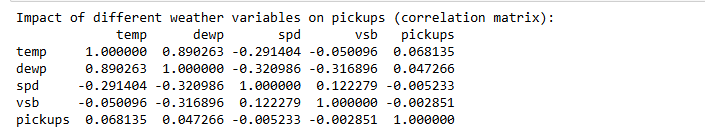

In [407]:
# Define weather conditions of interest
weather_conditions = ['temp', 'vsb', 'spd', 'pcp01', 'pcp06', 'pcp24', 'sd']

# Group by holiday status and weather conditions to find the average number of pickups
holiday_weather_pickups = df.groupby([df['hday']=='Y'] + weather_conditions)['pickups'].mean()

print(f"Average number of pickups on the basis of holiday status and weather conditions:\n\n{holiday_weather_pickups}")

Average number of pickups on the basis of holiday status and weather conditions:

hday   temp  vsb   spd        pcp01  pcp06  pcp24  sd      
False  2.0   10.0  7.000000   0.0    0.0    0.090  7.395833    256.285714
                   8.000000   0.0    0.0    0.090  7.395833    267.714286
                   13.000000  0.0    0.0    0.090  7.395833    296.333333
       3.0   10.0  11.000000  0.0    0.0    0.090  7.395833    289.428571
                   14.000000  0.0    0.0    0.090  7.395833    312.571429
                                                                  ...    
True   83.0  10.0  5.500000   0.0    0.0    0.000  0.000000    386.714286
       84.0  10.0  4.333333   0.0    0.0    0.125  0.000000    365.857143
                   6.000000   0.0    0.0    0.125  0.000000    389.428571
                   10.000000  0.0    0.0    0.125  0.000000    392.571429
       85.0  10.0  3.666667   0.0    0.0    0.125  0.000000    377.857143
Name: pickups, Length: 3259, dtype: float64


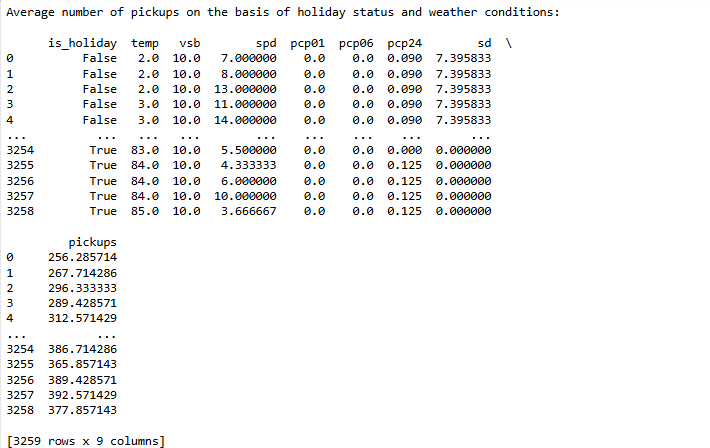


## Other than given questions I have tried many things in the EDA to do.
 

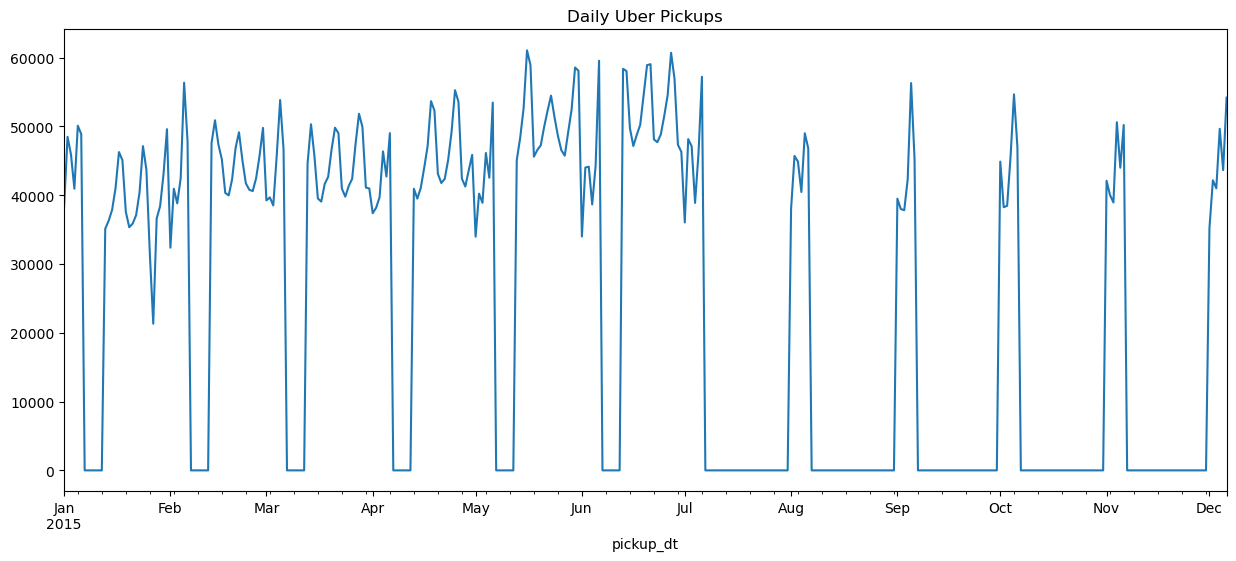

In [411]:
df.set_index('pickup_dt', inplace=True)
df['pickups'].resample('D').sum().plot(figsize=(15, 6))
plt.title('Daily Uber Pickups')
plt.show()


* Time series analysis by which we can see that how the number of pickups are changing across the months

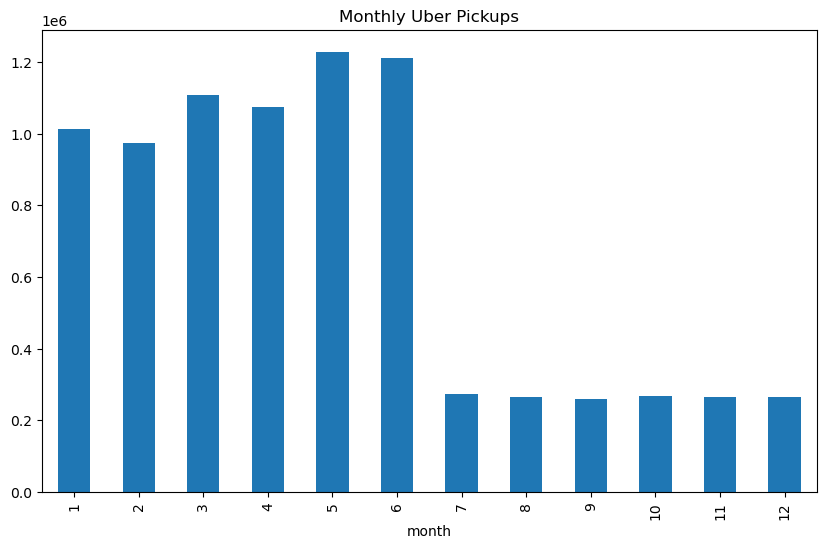

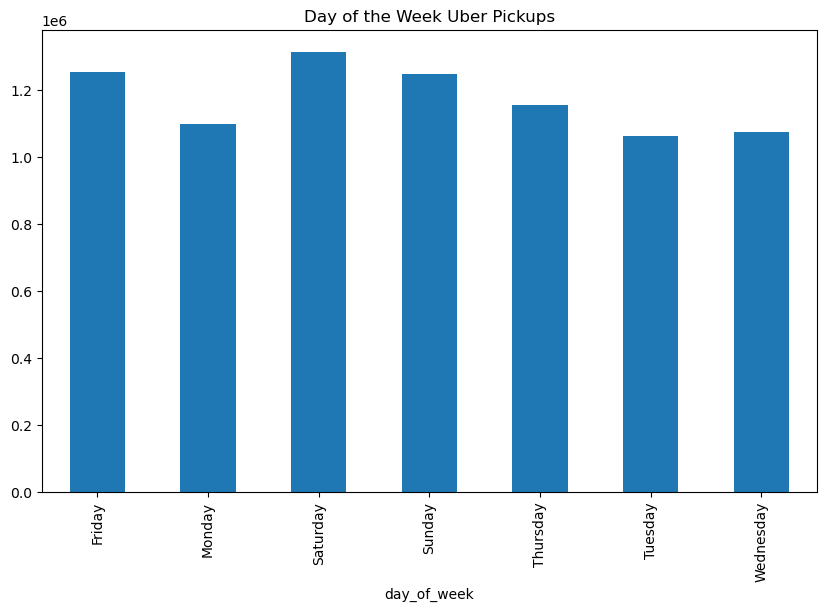

In [412]:
df['month'] = df.index.month
df['day_of_week'] = df.index.day_name()

seasonal_pickups = df.groupby('month')['pickups'].sum()
day_of_week_pickups = df.groupby('day_of_week')['pickups'].sum()

seasonal_pickups.plot(kind='bar', figsize=(10, 6))
plt.title('Monthly Uber Pickups')
plt.show()

day_of_week_pickups.plot(kind='bar', figsize=(10, 6))
plt.title('Day of the Week Uber Pickups')
plt.show()
